<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PCA-para-Visualização" data-toc-modified-id="PCA-para-Visualização-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>PCA para Visualização</a></span><ul class="toc-item"><li><span><a href="#Lendo-os-Dados" data-toc-modified-id="Lendo-os-Dados-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Lendo os Dados</a></span></li><li><span><a href="#Plotando-os-Dados" data-toc-modified-id="Plotando-os-Dados-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plotando os Dados</a></span></li><li><span><a href="#Aplicando-PCA" data-toc-modified-id="Aplicando-PCA-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Aplicando PCA</a></span><ul class="toc-item"><li><span><a href="#Normalizando-Dados" data-toc-modified-id="Normalizando-Dados-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Normalizando Dados</a></span></li><li><span><a href="#Implementando-PCA" data-toc-modified-id="Implementando-PCA-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Implementando PCA</a></span></li></ul></li><li><span><a href="#Reduzindo-Dimensionalidade" data-toc-modified-id="Reduzindo-Dimensionalidade-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Reduzindo Dimensionalidade</a></span><ul class="toc-item"><li><span><a href="#Projetando-Dados" data-toc-modified-id="Projetando-Dados-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Projetando Dados</a></span></li><li><span><a href="#Recuperando-Dimensões" data-toc-modified-id="Recuperando-Dimensões-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Recuperando Dimensões</a></span></li><li><span><a href="#Test-Cases" data-toc-modified-id="Test-Cases-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Test Cases</a></span></li></ul></li></ul></li><li><span><a href="#PCA-Reconstrução-de-Faces" data-toc-modified-id="PCA-Reconstrução-de-Faces-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>PCA Reconstrução de Faces</a></span><ul class="toc-item"><li><span><a href="#Definindo-Funções" data-toc-modified-id="Definindo-Funções-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Definindo Funções</a></span></li><li><span><a href="#Lendo-os-Dados" data-toc-modified-id="Lendo-os-Dados-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Lendo os Dados</a></span></li><li><span><a href="#Aplicando-PCA" data-toc-modified-id="Aplicando-PCA-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Aplicando PCA</a></span></li><li><span><a href="#Reduzindo-Dimensionalidade" data-toc-modified-id="Reduzindo-Dimensionalidade-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Reduzindo Dimensionalidade</a></span></li></ul></li><li><span><a href="#Bônus" data-toc-modified-id="Bônus-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bônus</a></span><ul class="toc-item"><li><span><a href="#Definindo-Funções" data-toc-modified-id="Definindo-Funções-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Definindo Funções</a></span></li></ul></li></ul></div>

Este notebook tem por objetivo armazenar instruções referentes a segunda parte do Exercício 7 do curso de Introdução a Machine Learning. Nele, será possível encontrar códigos relacionados ao modelo ```PCA``` para redução de dimensionalidade, sendo este aplicado, em um primeiro momento, a um problema de visualização de dados e, em seguida, a um desafio de reconhecimento facial.

## PCA para Visualização

### Lendo os Dados

In [1]:
% Lendo os dados
load('ex7data1.mat')

In [2]:
% Verificando output
size(X)

ans =

   50    2



Trata-se de um dataset pequeno. Vamos visualizar o conteúdo das primeiras linhas

In [3]:
% Primeiras linhas
X(1:5, :)

ans =

   3.3816   3.3891
   4.5279   5.8542
   2.6557   4.4120
   2.7652   3.7154
   2.8466   4.1755



### Plotando os Dados

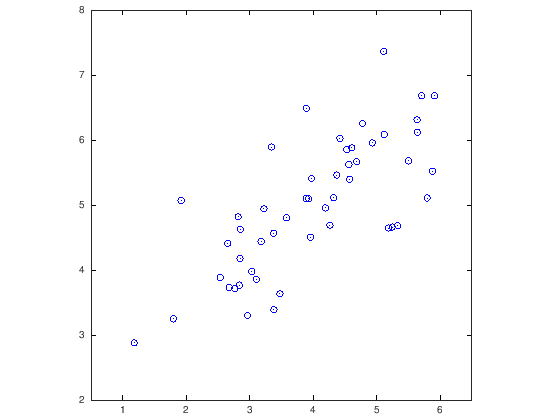

In [5]:
% Visualizando os Dados
plot(X(:, 1), X(:, 2), 'bo');
axis([0.5 6.5 2 8]); axis square;

### Aplicando PCA

#### Normalizando Dados

In [48]:
function [X_norm, mu, sigma_std] = featureNormalize(X)
%FEATURENORMALIZE Normalizes the features in X 
%   FEATURENORMALIZE(X) returns a normalized version of X where
%   the mean value of each feature is 0 and the standard deviation
%   is 1. This is often a good preprocessing step to do when
%   working with learning algorithms.

mu = mean(X);
X_norm = bsxfun(@minus, X, mu);

sigma_std = std(X_norm);
X_norm = bsxfun(@rdivide, X_norm, sigma_std);


% ============================================================

end

In [61]:
% Normalizando
[X_norm, mu, sigma_std] = featureNormalize(X);

In [62]:
% Verificando e comparando primeiras linhas
X(1:5, :)
X_norm(1:5, :)

ans =

   3.3816   3.3891
   4.5279   5.8542
   2.6557   4.4120
   2.7652   3.7154
   2.8466   4.1755

ans =

  -0.51805  -1.57678
   0.45915   0.83190
  -1.13685  -0.57730
  -1.04346  -1.25795
  -0.97413  -0.80838



#### Implementando PCA

Para aplicação do modelo, deve-se definir uma função capaz de realizar com eficiência a redução de dimensionalidade proposta.

O retorno dessa função engloba as matrizes ```U``` (contendo os vetores relacionados a dimensão K desejada e utilizada para o cálculo de z) e ```S``` (matriz cuja diagonal se relaciona ao melhor valor de K)

In [63]:
% Primeiro passo: calculando sigma
[m n] = size(X_norm);
sigma = (X_norm' * X_norm) / m;

In [64]:
% Verificando operação
size(sigma)
sigma

ans =

   2   2

sigma =

   0.98000   0.72082
   0.72082   0.98000



Pelo menos as dimensões resultaram como o esperado n x n.

Como desejamos reduzir as dimensões de 2D para 1D, vamos pegar apenas o primeiro elemento da matriz U resultante após chamar a função ```svd```.

In [65]:
% Chamando svd
[U, S, V] = svd(sigma);

In [66]:
size(U)
size(S)
size(V)

ans =

   2   2

ans =

   2   2

ans =

   2   2



In [67]:
% Coletando vetores para 1D
k = 1;
U_reduce = U(:, 1:k)
size(U_reduce)

U_reduce =

  -0.70711
  -0.70711

ans =

   2   1



In [68]:
z = X * U_reduce

z =

  -4.7876
  -7.3412
  -4.9976
  -4.5825
  -4.9654
  -7.3391
  -5.0266
  -8.9039
  -6.3833
  -7.2020
  -7.0511
  -6.9529
  -6.4675
  -7.0043
  -4.6696
  -8.4481
  -7.3197
  -5.2870
  -8.8200
  -6.9502
  -8.7599
  -5.9273
  -8.3154
  -6.3307
  -4.5403
  -5.7745
  -7.6965
  -7.7084
  -5.3993
  -6.3563
  -6.5310
  -8.0618
  -4.9222
  -7.0797
  -5.6150
  -7.8001
  -4.5302
  -7.9053
  -3.5671
  -6.6706
  -7.3869
  -5.3854
  -4.9585
  -7.4169
  -4.4293
  -6.6323
  -2.8701
  -4.9427
  -5.9825
  -7.9217



In [69]:
size(z)

ans =

   50    1



In [70]:
% Pipeline completo
[m n] = size(X_norm);
sigma = (X_norm' * X_norm) / m;
[U, S, V] = svd(sigma);
k = 1;
U_reduce = U(:, 1:k);
z = X * U_reduce;

In [71]:
size(z)

ans =

   50    1



In [73]:
% Plotando dados
function drawLine(p1, p2, varargin)
%DRAWLINE Draws a line from point p1 to point p2
%   DRAWLINE(p1, p2) Draws a line from point p1 to point p2 and holds the
%   current figure

plot([p1(1) p2(1)], [p1(2) p2(2)], varargin{:});

end

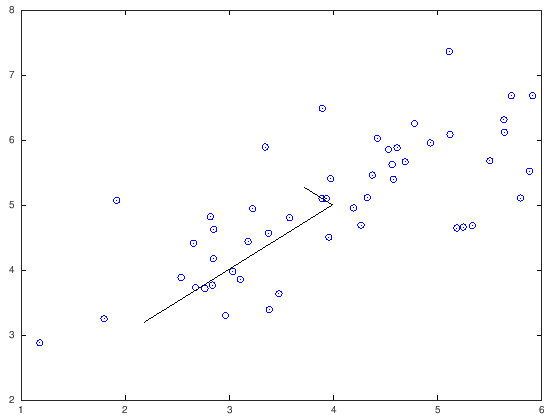

In [117]:
# Verificando vetores U (z)
plot(X(:, 1), X(:, 2), 'bo');
hold on;
drawLine(mu, mu + 1.5 * S(1,1) * U(:,1)', '-k', 'LineWidth', 2);
drawLine(mu, mu + 1.5 * S(2,2) * U(:,2)', '-k', 'LineWidth', 2);
hold off;

### Reduzindo Dimensionalidade

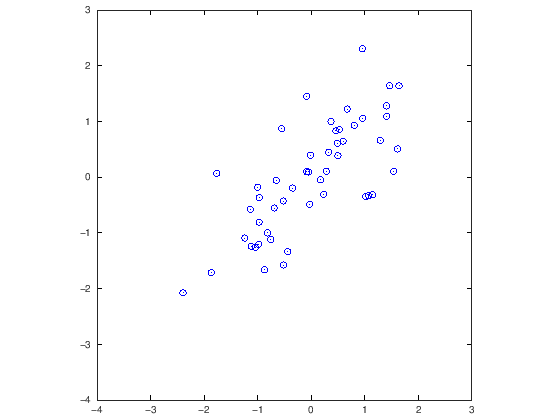

In [82]:
%  Plot the normalized dataset (returned from pca)
plot(X_norm(:, 1), X_norm(:, 2), 'bo');
axis([-4 3 -4 3]); axis square

#### Projetando Dados

In [84]:
z = zeros(size(X, 1), k)

z =

   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0



In [98]:
% Para cada exemplo do dataset, será necessário projetar os dados
[m n] = size(X_norm);
Z = zeros(size(X, 1), k)
for i = 1:m
    x = X_norm(i, :)';
    projection_k = x' * U_reduce;
    Z(i, :) = projection_k;
endfor

Z =

   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0



In [99]:
Z

Z =

   1.4812739
  -0.9129123
   1.2120866
   1.6273401
   1.2604241
  -0.9670022
   1.2560597
  -2.3179497
  -0.0296900
  -0.7738612
  -0.6253290
  -0.5472454
  -0.0887803
  -0.5205690
   1.5484340
  -1.8968459
  -0.8778846
   0.9464647
  -2.3065395
  -0.4731351
  -2.1951852
   0.3850966
  -1.7668851
   0.0512347
   1.6483886
   0.5030287
  -1.2246766
  -1.1602077
   0.8337522
  -0.0068621
  -0.2256510
  -1.4978878
   1.3252858
  -0.5865692
   0.6722510
  -1.3393819
   1.6705348
  -1.3783654
   2.5341974
  -0.2757079
  -0.9669598
   0.8792732
   1.2836292
  -0.9797211
   1.7945047
  -0.2692302
   3.1608862
   1.2008003
   0.3642308
  -1.4281420



In [139]:
% Comparando com operação vetorizada
k = 1;
[m n] = size(X_norm);
sigma = (X_norm' * X_norm) / m;

[U, S, V] = svd(sigma);
U_reduce = U(:, 1:k);

z = X_norm * U_reduce;

In [133]:
% Comparando primeiras linhas
Z(1:5, :)
z(1:5, :)

ans =

   1.48127
  -0.91291
   1.21209
   1.62734
   1.26042

ans =

   1.48127
  -0.91291
   1.21209
   1.62734
   1.26042



Operação vetorizada implementada com sucesso!

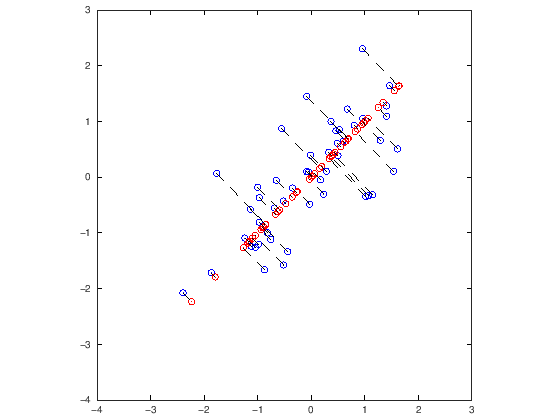

In [116]:
% Verificando aproximação
plot(X_norm(:, 1), X_norm(:, 2), 'bo');
axis([-4 3 -4 3]); axis square
hold on;
plot(X_rec(:, 1), X_rec(:, 2), 'ro');
for i = 1:size(X_norm, 1)
    drawLine(X_norm(i,:), X_rec(i,:), '--k', 'LineWidth', 1);
end
hold off

#### Recuperando Dimensões

In [106]:
% Implementando recuperação
size(z)
size(X_norm)

ans =

   50    1

ans =

   50    2



In [107]:
size(U_reduce)

ans =

   2   1



In [108]:
X_rec = z * U_reduce'

X_rec =

  -1.0474188  -1.0474188
   0.6455265   0.6455265
  -0.8570746  -0.8570746
  -1.1507032  -1.1507032
  -0.8912544  -0.8912544
   0.6837738   0.6837738
  -0.8881683  -0.8881683
   1.6390379   1.6390379
   0.0209940   0.0209940
   0.5472025   0.5472025
   0.4421744   0.4421744
   0.3869609   0.3869609
   0.0627771   0.0627771
   0.3680979   0.3680979
  -1.0949082  -1.0949082
   1.3412726   1.3412726
   0.6207581   0.6207581
  -0.6692516  -0.6692516
   1.6309698   1.6309698
   0.3345570   0.3345570
   1.5522304   1.5522304
  -0.2723044  -0.2723044
   1.2493764   1.2493764
  -0.0362284  -0.0362284
  -1.1655867  -1.1655867
  -0.3556950  -0.3556950
   0.8659771   0.8659771
   0.8203907   0.8203907
  -0.5895518  -0.5895518
   0.0048522   0.0048522
   0.1595594   0.1595594
   1.0591666   1.0591666
  -0.9371186  -0.9371186
   0.4147671   0.4147671
  -0.4753532  -0.4753532
   0.9470860   0.9470860
  -1.1812465  -1.1812465
   0.9746515   0.9746515
  -1.7919482  -1.7919482
   0.1949549   0

Para verificar se a operação funcionou, vamos comparar os primeiros exemplos dos conjuntos ```X_rec``` e ```X_norm```

In [111]:
X_norm(1:5, :)
X_rec(1:5, :)

ans =

  -0.51805  -1.57678
   0.45915   0.83190
  -1.13685  -0.57730
  -1.04346  -1.25795
  -0.97413  -0.80838

ans =

  -1.04742  -1.04742
   0.64553   0.64553
  -0.85707  -0.85707
  -1.15070  -1.15070
  -0.89125  -0.89125



Obviamente, houve perdas nos dados. De toda forma, é possível enxeregar uma certa proximidade entre os conjuntos.

In [138]:
function X_rec = recoverData(Z, U, K)
%RECOVERDATA Recovers an approximation of the original data when using the 
%projected data
%   X_rec = RECOVERDATA(Z, U, K) recovers an approximation the 
%   original data that has been reduced to K dimensions. It returns the
%   approximate reconstruction in X_rec.
%

% You need to return the following variables correctly.
X_rec = zeros(size(Z, 1), size(U, 1));

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the approximation of the data by projecting back
%               onto the original space using the top K eigenvectors in U.
%
%               For the i-th example Z(i,:), the (approximate)
%               recovered data for dimension j is given as follows:
%                    v = Z(i, :)';
%                    recovered_j = v' * U(j, 1:K)';
%
%               Notice that U(j, 1:K) is a row vector.
%               
U_reduce = U(:, K); % Correto: U_reduce = U(:, 1:K);
X_rec = Z * U_reduce';

% =============================================================

end

#### Test Cases

In [123]:
Q = reshape([1:15],5,3);
recoverData(Q, magic(5), 3)

error: recoverData: operator *: nonconformant arguments (op1 is 5x3, op2 is 1x5)
error: called from
    recoverData at line 24 column 7


In [125]:
Q
magic(5)

Q =

    1    6   11
    2    7   12
    3    8   13
    4    9   14
    5   10   15

ans =

   17   24    1    8   15
   23    5    7   14   16
    4    6   13   20   22
   10   12   19   21    3
   11   18   25    2    9



In [129]:
k_teste = 3;
U_teste = magic(5);
U_r = U_teste(:, k_teste)

U_r =

    1
    7
   13
   19
   25



In [135]:
U
U_reduce

U =

  -0.70711  -0.70711
  -0.70711   0.70711

U_reduce =

  -0.70711
  -0.70711



Erro entendido! Correto:

In [136]:
k_teste = 3;
U_teste = magic(5);
U_r = U_teste(:, 1:k_teste) % Correção implementada

U_r =

   17   24    1
   23    5    7
    4    6   13
   10   12   19
   11   18   25



## PCA Reconstrução de Faces

### Definindo Funções

In [146]:
function [U, S] = pca(X)
%PCA Run principal component analysis on the dataset X
%   [U, S, X] = pca(X) computes eigenvectors of the covariance matrix of X
%   Returns the eigenvectors U, the eigenvalues (on diagonal) in S
%

% Useful values
[m, n] = size(X);

% You need to return the following variables correctly.
U = zeros(n);
S = zeros(n);

% ====================== YOUR CODE HERE ======================
% Instructions: You should first compute the covariance matrix. Then, you
%               should use the "svd" function to compute the eigenvectors
%               and eigenvalues of the covariance matrix. 
%
% Note: When computing the covariance matrix, remember to divide by m (the
%       number of examples).
%

sigma = (X' * X) / m;
[U, S, V] = svd(sigma);

% =========================================================================

end

In [147]:
% Definindo função para plotagem dos dados
function [h, display_array] = displayData(X, example_width)
%DISPLAYDATA Display 2D data in a nice grid
%   [h, display_array] = DISPLAYDATA(X, example_width) displays 2D data
%   stored in X in a nice grid. It returns the figure handle h and the 
%   displayed array if requested.

% Set example_width automatically if not passed in
if ~exist('example_width', 'var') || isempty(example_width) 
	example_width = round(sqrt(size(X, 2)));
end

% Gray Image
colormap(gray);

% Compute rows, cols
[m n] = size(X);
example_height = (n / example_width);

% Compute number of items to display
display_rows = floor(sqrt(m));
display_cols = ceil(m / display_rows);

% Between images padding
pad = 1;

% Setup blank display
display_array = - ones(pad + display_rows * (example_height + pad), ...
                       pad + display_cols * (example_width + pad));

% Copy each example into a patch on the display array
curr_ex = 1;
for j = 1:display_rows
	for i = 1:display_cols
		if curr_ex > m, 
			break; 
		end
		% Copy the patch
		
		% Get the max value of the patch
		max_val = max(abs(X(curr_ex, :)));
		display_array(pad + (j - 1) * (example_height + pad) + (1:example_height), ...
		              pad + (i - 1) * (example_width + pad) + (1:example_width)) = ...
						reshape(X(curr_ex, :), example_height, example_width) / max_val;
		curr_ex = curr_ex + 1;
	end
	if curr_ex > m, 
		break; 
	end
end

% Display Image
h = imagesc(display_array, [-1 1]);

% Do not show axis
axis image off

drawnow;

end

In [148]:
function [X_norm, mu, sigma] = featureNormalize(X)
%FEATURENORMALIZE Normalizes the features in X 
%   FEATURENORMALIZE(X) returns a normalized version of X where
%   the mean value of each feature is 0 and the standard deviation
%   is 1. This is often a good preprocessing step to do when
%   working with learning algorithms.

mu = mean(X);
X_norm = bsxfun(@minus, X, mu);

sigma = std(X_norm);
X_norm = bsxfun(@rdivide, X_norm, sigma);


% ============================================================

end

In [149]:
function Z = projectData(X, U, K)
%PROJECTDATA Computes the reduced data representation when projecting only 
%on to the top k eigenvectors
%   Z = projectData(X, U, K) computes the projection of 
%   the normalized inputs X into the reduced dimensional space spanned by
%   the first K columns of U. It returns the projected examples in Z.
%

% You need to return the following variables correctly.
Z = zeros(size(X, 1), K);

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the projection of the data using only the top K 
%               eigenvectors in U (first K columns). 
%               For the i-th example X(i,:), the projection on to the k-th 
%               eigenvector is given as follows:
%                    x = X(i, :)';
%                    projection_k = x' * U(:, k);
%

U_reduce = U(:, 1:K);
Z = X * U_reduce;

% =============================================================

end


In [150]:
function X_rec = recoverData(Z, U, K)
%RECOVERDATA Recovers an approximation of the original data when using the 
%projected data
%   X_rec = RECOVERDATA(Z, U, K) recovers an approximation the 
%   original data that has been reduced to K dimensions. It returns the
%   approximate reconstruction in X_rec.
%

% You need to return the following variables correctly.
X_rec = zeros(size(Z, 1), size(U, 1));

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the approximation of the data by projecting back
%               onto the original space using the top K eigenvectors in U.
%
%               For the i-th example Z(i,:), the (approximate)
%               recovered data for dimension j is given as follows:
%                    v = Z(i, :)';
%                    recovered_j = v' * U(j, 1:K)';
%
%               Notice that U(j, 1:K) is a row vector.
%               
U_reduce = U(:, 1:K);
X_rec = Z * U_reduce';

% =============================================================

end


### Lendo os Dados

In [151]:
% Lendo dados
load ('ex7faces.mat')

In [152]:
% Verificando output
size(X)

ans =

   5000   1024



Isso indica que o dataset contém 5000 imagens de dimensões 32x32 (=1024 features).

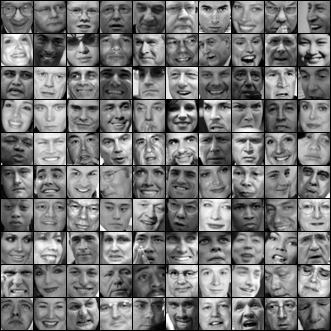

In [153]:
displayData(X(1:100, :));

### Aplicando PCA

In [154]:
%  Before running PCA, it is important to first normalize X by subtracting 
%  the mean value from each feature
[X_norm, mu, sigma] = featureNormalize(X);

%  Run PCA
[U, S] = pca(X_norm);

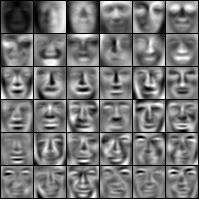

In [155]:
%  Visualize the top 36 eigenvectors found
displayData(U(:, 1:36)');

### Reduzindo Dimensionalidade

In [159]:
K = 100;
Z = projectData(X_norm, U, K);

fprintf('The projected data Z has a size of: \n')
fprintf('%d \n', size(Z));

The projected data Z has a size of: 
5000 
100 



Visualizing the projected (reduced dimension) faces.



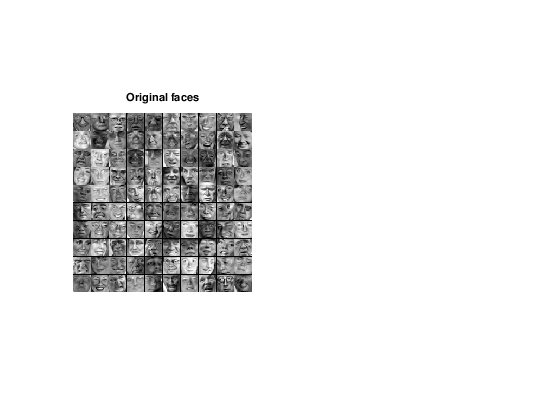

In [160]:
fprintf('\nVisualizing the projected (reduced dimension) faces.\n\n');

K = 100;
X_rec  = recoverData(Z, U, K);

% Display normalized data
subplot(1, 2, 1);
displayData(X_norm(1:100,:));
title('Original faces');
axis square;

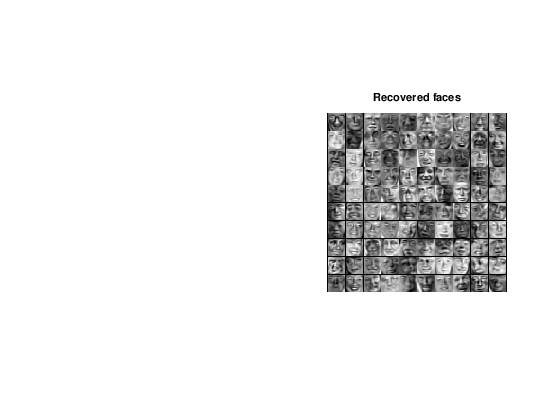

In [161]:
% Display reconstructed data from only k eigenfaces
subplot(1, 2, 2);
displayData(X_rec(1:100,:));
title('Recovered faces');
axis square;

## Bônus

### Definindo Funções

In [163]:
% Redefinindo função findClosestCentroids
function idx = findClosestCentroids(X, centroids)
%FINDCLOSESTCENTROIDS computes the centroid memberships for every example
%   idx = FINDCLOSESTCENTROIDS (X, centroids) returns the closest centroids
%   in idx for a dataset X where each row is a single example. idx = m x 1 
%   vector of centroid assignments (i.e. each entry in range [1..K])
%

% Set K
K = size(centroids, 1);

% You need to return the following variables correctly.
idx = zeros(size(X,1), 1);

% ====================== YOUR CODE HERE ======================
% Instructions: Go over every example, find its closest centroid, and store
%               the index inside idx at the appropriate location.
%               Concretely, idx(i) should contain the index of the centroid
%               closest to example i. Hence, it should be a value in the 
%               range 1..K
%
% Note: You can use a for-loop over the examples to compute this.
%

% Aplicando pipeline a todo o dataset
m = size(X, 1);
idx = zeros(m, 1);
for i = 1:m
    sample = X(i, :);
    dist = sample - centroids;
    magnitude = [];
    for j = 1:size(dist, 1)
        magnitude = [magnitude; sqrt(sum(dist(j, :).^2))];
    endfor
    
    c = find(min(magnitude) == magnitude);
    if size(c, 1) > 1
        c = c(1);
    end
    idx(i) = c;    
endfor

% =============================================================

end

In [164]:
function centroids = computeCentroids(X, idx, K)
%COMPUTECENTROIDS returns the new centroids by computing the means of the 
%data points assigned to each centroid.
%   centroids = COMPUTECENTROIDS(X, idx, K) returns the new centroids by 
%   computing the means of the data points assigned to each centroid. It is
%   given a dataset X where each row is a single data point, a vector
%   idx of centroid assignments (i.e. each entry in range [1..K]) for each
%   example, and K, the number of centroids. You should return a matrix
%   centroids, where each row of centroids is the mean of the data points
%   assigned to it.
%

% Useful variables
[m n] = size(X);

% You need to return the following variables correctly.
centroids = zeros(K, n);


% ====================== YOUR CODE HERE ======================
% Instructions: Go over every centroid and compute mean of all points that
%               belong to it. Concretely, the row vector centroids(i, :)
%               should contain the mean of the data points assigned to
%               centroid i.
%
% Note: You can use a for-loop over the centroids to compute this.
%

for i = 1:K
    number = size(find(idx == i), 1);
    centroids(i, :) = sum([idx == i] .* X) / number;
endfor


% =============================================================


end

In [165]:
function centroids = kMeansInitCentroids(X, K)
%KMEANSINITCENTROIDS This function initializes K centroids that are to be 
%used in K-Means on the dataset X
%   centroids = KMEANSINITCENTROIDS(X, K) returns K initial centroids to be
%   used with the K-Means on the dataset X
%

% You should return this values correctly
centroids = zeros(K, size(X, 2));

% ====================== YOUR CODE HERE ======================
% Instructions: You should set centroids to randomly chosen examples from
%               the dataset X
%

% Randomly reorder the indices of examples
randidx = randperm(size(X, 1));
% Take the first K examples as centroids
centroids = X(randidx(1:K), :);

% =============================================================

end

In [166]:
function [centroids, idx] = runkMeans(X, initial_centroids, ...
                                      max_iters, plot_progress)
%RUNKMEANS runs the K-Means algorithm on data matrix X, where each row of X
%is a single example
%   [centroids, idx] = RUNKMEANS(X, initial_centroids, max_iters, ...
%   plot_progress) runs the K-Means algorithm on data matrix X, where each 
%   row of X is a single example. It uses initial_centroids used as the
%   initial centroids. max_iters specifies the total number of interactions 
%   of K-Means to execute. plot_progress is a true/false flag that 
%   indicates if the function should also plot its progress as the 
%   learning happens. This is set to false by default. runkMeans returns 
%   centroids, a Kxn matrix of the computed centroids and idx, a m x 1 
%   vector of centroid assignments (i.e. each entry in range [1..K])
%

% Set default value for plot progress
if ~exist('plot_progress', 'var') || isempty(plot_progress)
    plot_progress = false;
end

% Plot the data if we are plotting progress
if plot_progress
    figure;
    hold on;
end

% Initialize values
[m n] = size(X);
K = size(initial_centroids, 1);
centroids = initial_centroids;
previous_centroids = centroids;
idx = zeros(m, 1);

% Run K-Means
for i=1:max_iters
    
    % Output progress
    fprintf('K-Means iteration %d/%d...\n', i, max_iters);
    if exist('OCTAVE_VERSION')
        fflush(stdout);
    end
    
    % For each example in X, assign it to the closest centroid
    idx = findClosestCentroids(X, centroids);
    
    % Optionally, plot progress here
    if plot_progress
        plotProgresskMeans(X, centroids, previous_centroids, idx, K, i);
        previous_centroids = centroids;
        fprintf('Press enter to continue.\n');
        pause;
    end
    
    % Given the memberships, compute new centroids
    centroids = computeCentroids(X, idx, K);
end

% Hold off if we are plotting progress
if plot_progress
    hold off;
end

end

In [168]:
function plotDataPoints(X, idx, K)
%PLOTDATAPOINTS plots data points in X, coloring them so that those with the same
%index assignments in idx have the same color
%   PLOTDATAPOINTS(X, idx, K) plots data points in X, coloring them so that those 
%   with the same index assignments in idx have the same color

% Create palette
palette = hsv(K + 1);
colors = palette(idx, :);

% Plot the data
scatter(X(:,1), X(:,2), 15, colors);

end


K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...
Program paused. Press enter to continue.
Paused, enter any value to continue
Program paused. Press enter to continue.
Paused, enter any value to continue


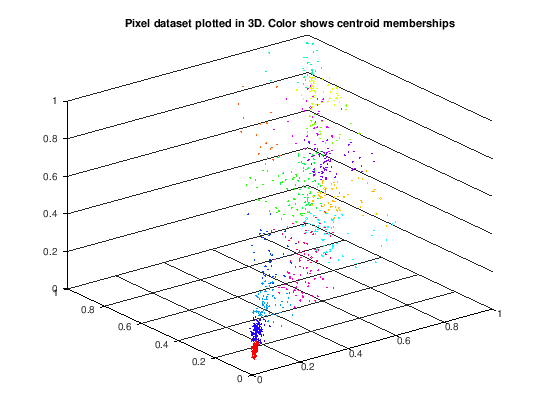

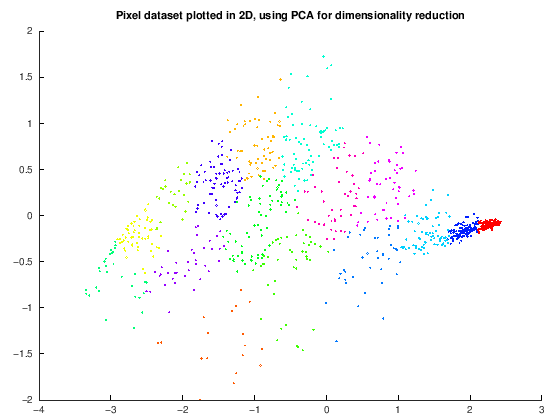

In [169]:
%% === Part 8(a): Optional (ungraded) Exercise: PCA for Visualization ===
%  One useful application of PCA is to use it to visualize high-dimensional
%  data. In the last K-Means exercise you ran K-Means on 3-dimensional 
%  pixel colors of an image. We first visualize this output in 3D, and then
%  apply PCA to obtain a visualization in 2D.

close all; close all; clc

% Reload the image from the previous exercise and run K-Means on it
% For this to work, you need to complete the K-Means assignment first
A = double(imread('bird_small.png'));

% If imread does not work for you, you can try instead
%   load ('bird_small.mat');

A = A / 255;
img_size = size(A);
X = reshape(A, img_size(1) * img_size(2), 3);
K = 16; 
max_iters = 10;
initial_centroids = kMeansInitCentroids(X, K);
[centroids, idx] = runkMeans(X, initial_centroids, max_iters);

%  Sample 1000 random indexes (since working with all the data is
%  too expensive. If you have a fast computer, you may increase this.
sel = floor(rand(1000, 1) * size(X, 1)) + 1;

%  Setup Color Palette
palette = hsv(K);
colors = palette(idx(sel), :);

%  Visualize the data and centroid memberships in 3D
figure;
scatter3(X(sel, 1), X(sel, 2), X(sel, 3), 10, colors);
title('Pixel dataset plotted in 3D. Color shows centroid memberships');
fprintf('Program paused. Press enter to continue.\n');
pause;

%% === Part 8(b): Optional (ungraded) Exercise: PCA for Visualization ===
% Use PCA to project this cloud to 2D for visualization

% Subtract the mean to use PCA
[X_norm, mu, sigma] = featureNormalize(X);

% PCA and project the data to 2D
[U, S] = pca(X_norm);
Z = projectData(X_norm, U, 2);

% Plot in 2D
figure;
plotDataPoints(Z(sel, :), idx(sel), K);
title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction');
fprintf('Program paused. Press enter to continue.\n');
pause;